<a href="https://colab.research.google.com/github/RuiaRui/pythons/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression with Facebook data

The data comes from Facebook pages of different companies. It was provided by:
S. Moro, P. Rita and B. Vala; Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach; Journal of Business Research, Elsevier; 2016

The input contains the following features:
- Category: manual content characterization: action (special offers and contests), product (direct advertisement, explicit brand content), and inspiration (non-explicit brand related content)
- Page total likes:	Number of people who have liked the company's page
- Type:	Type of content (Link, Photo, Status, Video)
- Post month: Month the post was published (January, February, March, …, December)
- Post hour: Hour the post was published (0, 1, 2, 3, 4, …, 23)
- Post weekday: Weekday the post was published (Sunday, Monday, …, Saturday)
- Paid: If the company paid Facebook for advertising (yes, no)

The output is (subset of the original ones):
- Number of likes of the post

Let us first load the data

In [32]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('Facebook_metrics/facebook_all.csv', delimiter=',')
X = data[:,:7]
y = data[:,16]

And split it into training and test sets (randomly in 75% - 25% proportions). For this, we will make use of a scikit-learn function.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=1)

To account for the bias in the model, we add a value 1 at the end of the training and test samples

In [35]:
Xbtrain = np.hstack((Xtrain,np.ones((Xtrain.shape[0],1))))
Xbtest = np.hstack((Xtest,np.ones((Xtest.shape[0],1))))

In [36]:
print(X.shape)
print(y.shape)
print(Xbtrain.shape)
print(Xtrain.shape)

(500, 7)
(500,)
(375, 8)
(375, 7)


Now, compute the parameters of a linear regressor from the training data. Follow the closed-form solution that we have seen in class.

In [37]:
#TODO
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(Xbtrain,ytrain)

r_sq = regr.score(Xbtrain, ytrain)
print('coefficient of determination:', r_sq)
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)

coefficient of determination: 0.04114396463413095
intercept: -435.94151476311384
slope: [ 5.49004585e-03  1.70053747e+01  4.59968995e+01 -2.23094875e+01
 -8.59805513e+00 -1.96114919e+00  6.87863700e+01  0.00000000e+00]


Apply the learnt model to the test data

In [38]:
#TODO
yhat=regr.predict(Xbtest)

And compute the root mean squared error of the predictions (I assume that the predictions are stored in yhat)

In [39]:
err = np.sqrt(np.mean((yhat-ytest)**2))
print("RMSE =",err)

RMSE = 296.21411505659125


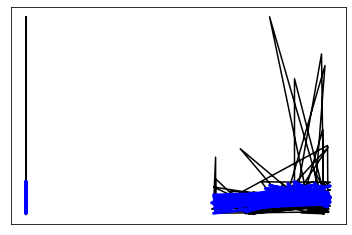

In [40]:
# Plot outputs
import matplotlib.pyplot as plt
plt.plot(Xtest, ytest,  color='black')
plt.plot(Xtest, yhat, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()